In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pygrib

Open the grib file and make sure its a read in correctly

In [36]:
grbs = pygrib.open('MRMS_VII_00.50_20210728-143439.grib2')
print(grbs)

In [37]:
for grb in grbs:
    print(grb)

1:43:43 (instant):regular_ll:heightAboveSea:level 500 m:fcst time 0 mins:from 202107281434


ECCODES ERROR   :  Key dataTime (unpack_long): Truncating time: non-zero seconds(39) ignored
ECCODES ERROR   :  Key dataTime (unpack_long): Truncating time: non-zero seconds(39) ignored


In [38]:
print(grb.keys())

['globalDomain', 'GRIBEditionNumber', 'tablesVersionLatestOfficial', 'tablesVersionLatest', 'grib2divider', 'angleSubdivisions', 'missingValue', 'ieeeFloats', 'isHindcast', 'section0Length', 'identifier', 'discipline', 'editionNumber', 'totalLength', 'sectionNumber', 'section1Length', 'numberOfSection', 'centre', 'centreDescription', 'subCentre', 'tablesVersion', 'masterDir', 'masterDir', 'localTablesVersion', 'significanceOfReferenceTime', 'year', 'month', 'day', 'hour', 'minute', 'second', 'dataDate', 'julianDay', 'dataTime', 'productionStatusOfProcessedData', 'typeOfProcessedData', 'md5Section1', 'selectStepTemplateInterval', 'selectStepTemplateInstant', 'stepType', 'is_chemical', 'is_chemical_distfn', 'is_chemical_srcsink', 'is_aerosol', 'is_aerosol_optical', 'setCalendarId', 'deleteCalendarId', 'sectionNumber', 'grib2LocalSectionPresent', 'deleteLocalDefinition', 'sectionNumber', 'gridDescriptionSectionPresent', 'section3Length', 'numberOfSection', 'sourceOfGridDefinition', 'numbe

In [39]:
lats, lons = grb.latlons()
vii = grb.values
print(np.shape(lats))
print(np.shape(vii))

(3500, 7000)
(3500, 7000)


In [40]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

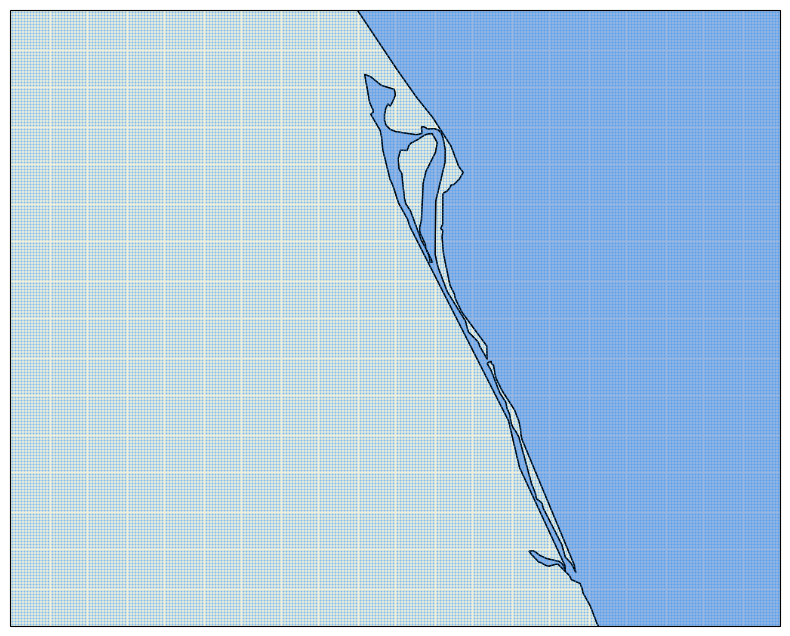

In [41]:
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
ax.set_extent([-82,-79.5,27,29],crs=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, edgecolor="black")
ax.add_feature(cfeature.OCEAN, edgecolor="black")
plt.scatter(x=lons,y=lats,color='dodgerblue',s=.3,alpha=.5,transform=ccrs.PlateCarree())


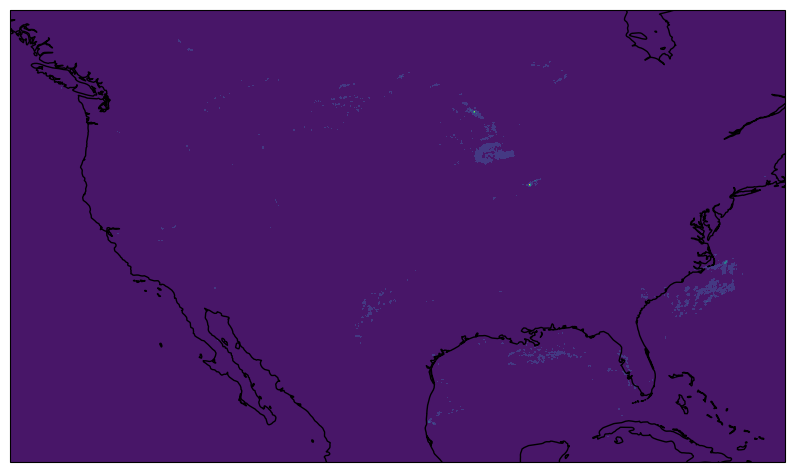

In [42]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
ax.set_extent([-70,-130,20,55],crs=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, edgecolor="black")
ax.add_feature(cfeature.OCEAN, edgecolor="black")
plt.contourf(lons,lats,vii,transform=ccrs.PlateCarree())
ax.coastlines()

In [43]:
import pickle

In [44]:
lats_file = open('/Users/brandonmcclung/Data/pickles/MRMS_lat.p','wb')
lons_file = open('/Users/brandonmcclung/Data/pickles/MRMS_lon.p','wb')

pickle.dump(lats,lats_file)
pickle.dump(lons,lons_file)

lats_file.close()
lons_file.close()



In [45]:
print(lats[:,1])

[54.995    54.985    54.975    ... 20.025    20.015    20.005001]


In [46]:
print(lons[1,:])cond

SyntaxError: invalid syntax (3688447700.py, line 1)

In [ ]:
import pandas as pd
import util

In [ ]:
yedge = np.squeeze(lats[:,1])
xedge= np.squeeze(lons[1,:])
xmid = []
ymid = []
i=0
while(i < len(xedge)-1):
    xmid.append((xedge[i]+xedge[i+1])/2) #Calculate and append midpoints
    i+=1
i=0
while(i < len(yedge)-1):
    ymid.append((yedge[i]+yedge[i+1])/2) #Calculate and append midpoints
    i+=1

xmid, ymid



([230.00999999985711,
  230.01999999957135,
  230.0299999992856,
  230.03999999899983,
  230.04999999871407,
  230.0599999984283,
  230.06999999814255,
  230.0799999978568,
  230.08999999757103,
  230.09999999728527,
  230.1099999969995,
  230.11999999671374,
  230.12999999642798,
  230.13999999614222,
  230.14999999585646,
  230.1599999955707,
  230.16999999528494,
  230.17999999499918,
  230.18999999471342,
  230.19999999442766,
  230.2099999941419,
  230.21999999385613,
  230.22999999357037,
  230.2399999932846,
  230.24999999299885,
  230.2599999927131,
  230.26999999242733,
  230.27999999214157,
  230.2899999918558,
  230.29999999157005,
  230.3099999912843,
  230.31999999099853,
  230.32999999071276,
  230.339999990427,
  230.34999999014124,
  230.35999998985548,
  230.36999998956972,
  230.37999998928396,
  230.3899999889982,
  230.39999998871244,
  230.40999998842668,
  230.41999998814092,
  230.42999998785515,
  230.4399999875694,
  230.44999998728363,
  230.45999998699787,
  

In [ ]:
# file = open(data_stor+'merlin_cg_df.p','wb')
# pickle.dump(merlin_cg,file)
# file.close()

file = open('/Users/brandonmcclung/Data/pickles/merlin_cg_df.p','rb')
cg_data = pickle.load(file)
file.close()

cc_data = pd.read_pickle("/Users/brandonmcclung/Data/pickles/2022_06_merlin_cc_df.p")

# file = open('/Users/brandonmcclung/Data/pickles/2022_06_merlin_cc_df.p','rb')
# cc_data = pickle.load(file)
# file.close()

# cc_data = pickle.load('Users/brandonmcclung/Data/KSC_Weather_Archive/pickles/2022_06_merlin_cc_df.p')

In [ ]:
cg_data

,Lat,Lon,SigStrength,real,SemiMajorAxis,SemiMinorAxis,EllipseAngle
Date,,,,,,,
05/30/2017 19:48:30,29.424999,-82.881666,4.7,'Real',2.9,0.4,325
05/30/2017 19:48:32,30.581943,-81.607222,-19.5,'Real',0.2,0.1,272
05/30/2017 19:48:32,30.581943,-81.607777,-8.3,'Real',0.2,0.2,274
05/30/2017 19:48:32,30.581666,-81.607500,-29.9,'Real',0.3,0.1,277
05/30/2017 19:48:32,29.245555,-82.529443,3.9,'Real',0.2,0.2,42
...,...,...,...,...,...,...,...
08/11/2023 23:58:13,29.035833,-81.009167,-7.4,'Real',3.4,0.4,345
08/11/2023 23:58:13,29.042778,-81.007500,-19.8,'Real',0.8,0.1,336
08/11/2023 23:58:13,29.047778,-81.007778,-11.1,'Real',1.4,0.2,339


In [ ]:
cc_data

,0,2,6,8,20,22,24,26
0,06/23/2022,19:18:33.8223000,29:00:34,-81:26:55,04.70,00.70,123,"62,64,65,66,67,68,69,70,71"
1,06/23/2022,19:18:38.6670000,29:02:28,-81:32:21,04.30,00.80,125,"62,65,66,67,68,69,71"
2,06/23/2022,19:24:16.3418000,29:02:06,-81:30:01,06.60,00.90,123,"62,64,65,66,67,68,69,70,71"
3,06/23/2022,19:24:16.3419000,29:04:34,-81:33:17,05.70,00.80,123,"62,65,66,67,68,69,70"
4,06/23/2022,19:24:46.1989000,29:00:01,-81:30:34,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2950496,06/06/2022,23:59:54.2684000,26:49:58,-80:05:49,15.40,01.60,160,"62,64,65,66,68,69,71"
2950497,06/06/2022,23:59:54.2685000,27:09:25,-80:11:42,NaN,NaN,NaN,NaN
2950498,06/06/2022,23:59:54.2944000,27:16:08,-80:15:13,11.80,01.50,158,"62,64,65,66,68,69"
2950499,06/06/2022,23:59:54.3492000,26:51:27,-80:06:38,21.30,02.00,162,"62,65,66,68,69"


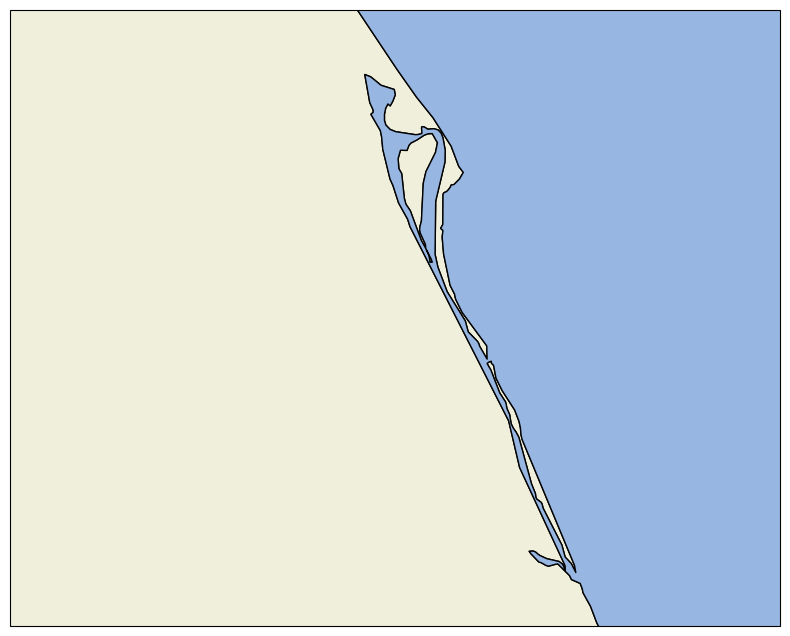

In [47]:
cc_dataset = xr.open_dataset("lightningData2.nc")



In [ ]:

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
ax.set_extent([-82,-79.5,27,29],crs=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, edgecolor="black")
ax.add_feature(cfeature.OCEAN, edgecolor="black")
